In [1]:
# Dependencies
import json
import requests as req
from citipy import citipy 
import random as r 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Save config information
api_key = "572ecb9cf7bb5d1eccdea81f6bd8913d"
url = "http://api.openweathermap.org/data/2.5/weather?"
equ_lat = -1.3552423
equ_lon = -88.3931602
coordinates= []
city_name = []

In [3]:
def generate_random_data(lat, lon, num_rows):
    for _ in range(num_rows):
        dec_lat = r.random()/100 + r.randint(1,50)
        dec_lon = r.random()/100+ r.randint(1,50)
        #print(lat+dec_lat,lon+dec_lon )
        coordinates.append((lat+dec_lat,lon+dec_lon))

generate_random_data(equ_lat, equ_lon, 50)

In [4]:
cities = []

for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon).city_name)
cities = list(set(cities))

In [5]:
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + str(city)
    print()
    print('City No ',cities.index(city),' City Name is ',city)
    print()
    print(query_url)


City No  0  City Name is  bonfim

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=bonfim

City No  1  City Name is  puerto leguizamo

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=puerto leguizamo

City No  2  City Name is  cozumel

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=cozumel

City No  3  City Name is  mazagao

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=mazagao

City No  4  City Name is  saint-georges

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=saint-georges

City No  5  City Name is  cockburn town

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=cockburn town

City No  6  City Name is  codrington

http://api.openweathermap.org/data/2.5/weather?appid=572ecb9cf7bb5d1eccdea81f6bd8913d&q=codrington

City No  7  City Name is  hav

In [6]:
city_lat = []
city_lon = []
city_temp = []
city_cloud = []
city_humid = []
city_wind = []

for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + str(city)
    #rint(city,'City Name is ',city)
    #print(query_url)
    # Get weather data
    weather_response = req.get(query_url)
    weather_json = weather_response.json()
    # Get temperature from JSON response
    #print(weather_json)
    city_name.append(weather_json['name'])
    city_lat.append(weather_json['coord']['lat'])
    city_lon.append(weather_json['coord']['lon'])
    city_temp.append(weather_json['main']['temp'])
    city_cloud.append(weather_json['clouds']['all'])
    city_humid.append(weather_json['main']['humidity'])
    city_wind.append(weather_json['wind']['speed'])
city_data = pd.DataFrame({'City_name': city_name,'Lat': city_lat,'Lon':city_lon,'Temp':city_temp,
                          'Cloudiness':city_cloud,'Humidity':city_humid,'Wind_speed':city_wind})
#print(city_name)

In [7]:
city_data

,City_name,Cloudiness,Humidity,Lat,Lon,Temp,Wind_speed
0,Bonfim,44,63,3.08,-59.95,301.471,2.30
1,Puerto Leguizamo,24,53,-0.19,-74.78,304.221,0.80
2,San Miguel de Cozumel,75,83,20.51,-86.95,300.010,2.10
3,Mazagao,64,78,-0.12,-51.29,302.171,6.00
4,Saint-Georges,0,74,46.62,-72.66,289.321,1.85
5,Cockburn Town,12,100,21.46,-71.14,301.571,1.60
6,Codrington,76,100,-38.27,141.97,284.671,3.10
7,Havelock,90,83,34.88,-76.90,295.640,7.70
8,Rock Sound,68,96,24.90,-76.20,303.321,7.55
9,Sinnamary,88,93,5.38,-52.95,301.071,7.35


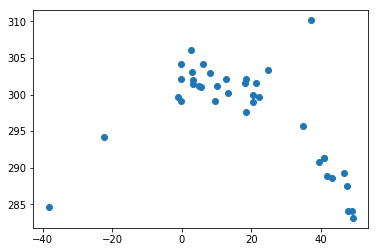

In [8]:
plt.xlabel = 'Latitude'
plt.ylabel = 'Temperature'
plt.title = 'Latitude Vs Temperate'

plt.scatter(x=city_data['Lat'],y = city_data['Temp'])
plt.show()

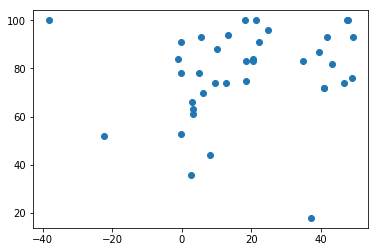

In [9]:
plt.xlabel = 'Latitude'
plt.ylabel = 'Humidity'
plt.title = 'Latitude Vs Humidity'

plt.scatter(x=city_data['Lat'],y = city_data['Humidity'])
plt.show()

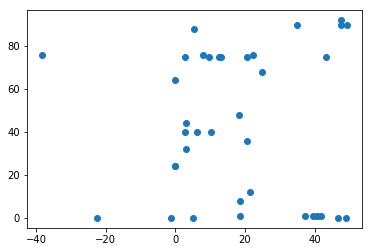

In [10]:
plt.xlabel = 'Latitude'
plt.ylabel = 'Cloudiness'
plt.title = 'Latitude Vs Cloudiness'

plt.scatter(x=city_data['Lat'],y = city_data['Cloudiness'])
plt.show()

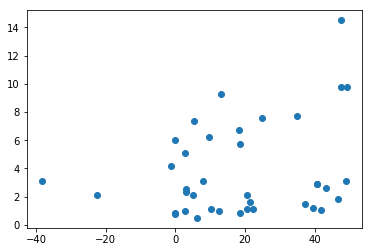

In [11]:
plt.xlabel = 'Latitude'
plt.ylabel = 'WindSpeed'
plt.title = 'Latitude Vs WindSpeed'

plt.scatter(x=city_data['Lat'],y = city_data['Wind_speed'])
plt.show()